#### Experiment filtering up and down methods

Might have to experiment with invr file 

First create a custom dataframe to experiment

In [1]:
# import libraries
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely.geometry as geom

/Users/h6x/anaconda3/envs/TDA/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Create a DataFrame with box names and values
# box_names = [chr(65 + i) for i in range(16)]
index = list(range(0, 49))
values = list(range(1, 50))

In [4]:
df = pd.DataFrame({'Index': index, 'Value': values})

In [5]:
df.head()

,Index,Value
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [6]:
# Sorting the DataFrame based on the 'rate' column :::: Values are needed to be sorted in ascending order
df.sort_values(by='Value', inplace=True)

# Adding a new column 'new_ID' with ID values starting from zero
df['sortedID'] = range(len(df))

In [7]:
df.head()

,Index,Value,sortedID
0,0,1,0
1,1,2,1
2,2,3,2
3,3,4,3
4,4,5,4


In [9]:
# Function to calculate square coordinates for a given name
def calculate_square_coordinates(row):
    value = row['Index']
    # Assuming each smaller square has a side length of 1 unit
    x = value % 7
    y = value // 7
    # Return square coordinates as a Shapely polygon
    return geom.Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])

In [10]:
# Calculate square coordinates for each row and create a geometry column
df['geometry'] = df.apply(calculate_square_coordinates, axis=1)

In [11]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Set the CRS to a simple Cartesian coordinate system
gdf.crs = "EPSG:3395"  # This is a commonly used projected CRS

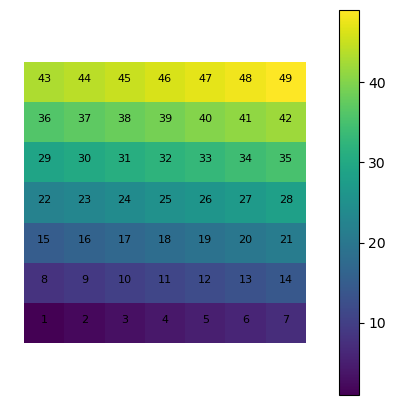

In [12]:
# plot the geodataframe

fig, ax = plt.subplots(figsize=(5, 5))
gdf.plot(ax=ax, column='Value', cmap='viridis', legend=True)
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['Value']):
    ax.text(x, y, label, fontsize=8, ha='center')
plt.axis('off')
plt.show()

In [13]:
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy.ndimage import gaussian_filter

# Define grid size
grid_size = (7, 7)  # Each region is a 7x7 grid
mean, std_dev = 0.5, 0.125  # Normal distribution parameters

# Generate random values from N(0.5, 0.125)
random_values = np.random.normal(mean, std_dev, grid_size)

# Apply Gaussian smoothing for spatial autocorrelation
smoothed_values = gaussian_filter(random_values, sigma=1.5)  # sigma controls smoothness

# Create DataFrame with spatially structured values
rows, cols = np.meshgrid(range(grid_size[0]), range(grid_size[1]), indexing='ij')
data = {
    "row": rows.ravel(),
    "col": cols.ravel(),
    "Value": smoothed_values.ravel()
}

df = pd.DataFrame(data)

# Assign a spatial index (you can also use a unique ID if needed)
df["Index"] = df.index

In [14]:
# Convert to a GeoDataFrame (assuming square regions)
df["geometry"] = gpd.points_from_xy(df["col"], df["row"])  # Simple point representation
gdf = gpd.GeoDataFrame(df, geometry="geometry")

<Axes: >

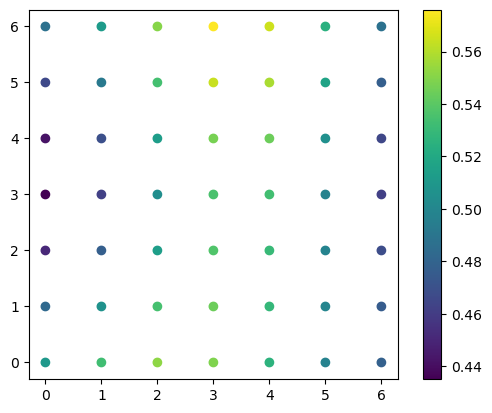

In [15]:
gdf.plot(column="Value", cmap="viridis", legend=True)

In [35]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import geometry as geom
from scipy.ndimage import gaussian_filter

# Set random seed for reproducibility
np.random.seed(42)

# Function to calculate square coordinates for a given index
def calculate_square_coordinates(row):
    value = row['Index']
    x = value % 7
    y = value // 7
    return geom.Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])

# Generate a DataFrame with 49 squares (7x7 grid)
num_squares = 7 * 7
df = pd.DataFrame({'Index': np.arange(num_squares)})

# Generate spatially correlated normal values
grid_size = (7, 7)
mean, std_dev = 0.5, 0.125
random_values = np.random.normal(mean, std_dev, grid_size)
smoothed_values = gaussian_filter(random_values, sigma=1.5)  # Spatial correlation

# Assign values to the DataFrame
df['Value'] = smoothed_values.ravel()

# Convert to GeoDataFrame with square geometries
df['geometry'] = df.apply(calculate_square_coordinates, axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

<Axes: >

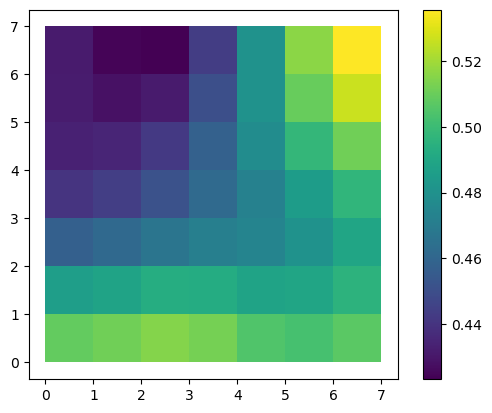

In [36]:
gdf.plot(column='Value', cmap='viridis', legend=True)

<Axes: ylabel='Frequency'>

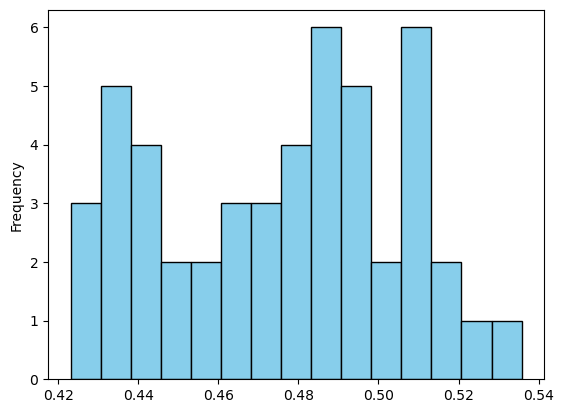

In [38]:
gdf['Value'].plot.hist(bins=15, color='skyblue', edgecolor='black')

In [20]:
gdf.head()

,Index,Value,geometry
0,0,0.585700,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1...."
1,1,0.560998,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2...."
2,2,0.539825,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3...."
3,3,0.529924,"POLYGON ((3.00000 0.00000, 4.00000 0.00000, 4...."
4,4,0.511589,"POLYGON ((4.00000 0.00000, 5.00000 0.00000, 5...."


In [25]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import geometry as geom
from scipy.ndimage import gaussian_filter

# Function to calculate square coordinates
def calculate_square_coordinates(row):
    value = row['Index']
    x = value % 7
    y = value // 7
    return geom.Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])

# Generate a DataFrame with 49 squares (7x7 grid)
num_squares = 7 * 7
df = pd.DataFrame({'Index': np.arange(num_squares)})

# Generate positively correlated normal values
grid_size = (7, 7)
mean, std_dev = 0.5, 0.125
random_values = np.random.normal(mean, std_dev, grid_size)
smoothed_values = gaussian_filter(random_values, sigma=1.5)  # Spatial correlation

# Generate a negatively correlated field by flipping alternate regions
negatively_correlated_values = -1 * smoothed_values + (2 * mean)  # Flip values around mean

# Assign values to the DataFrame
df['Value'] = negatively_correlated_values.ravel()

# Convert to GeoDataFrame with square geometries
df['geometry'] = df.apply(calculate_square_coordinates, axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry')

<Axes: >

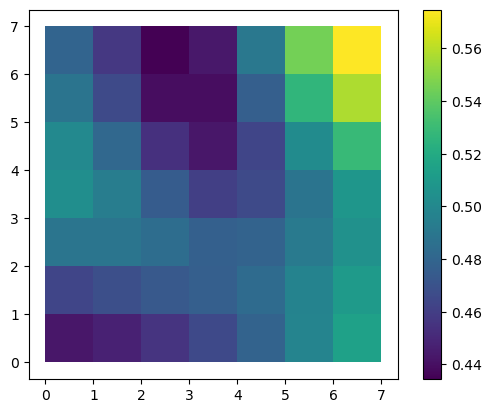

In [26]:
gdf.plot(column='Value', cmap='viridis', legend=True)

In [39]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely import geometry as geom
from scipy.ndimage import gaussian_filter

# Set random seed for reproducibility
np.random.seed(42)

# Function to calculate square coordinates for a given index
def calculate_square_coordinates(row):
    value = row['Index']
    x = value % 7
    y = value // 7
    return geom.Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)])

# Generate a DataFrame with 49 squares (7x7 grid)
num_squares = 7 * 7
df = pd.DataFrame({'Index': np.arange(num_squares)})

# Generate spatially correlated Inverse Gamma values
grid_size = (7, 7)
alpha, beta = 3, 0.25  # Inverse Gamma parameters

# Sample from Inverse Gamma
random_values = 1 / np.random.gamma(shape=alpha, scale=1/beta, size=grid_size)

# Apply Gaussian smoothing for spatial correlation
smoothed_values = gaussian_filter(random_values, sigma=1.5)  

# Assign values to the DataFrame
df['Value'] = smoothed_values.ravel()

# Convert to GeoDataFrame with square geometries
df['geometry'] = df.apply(calculate_square_coordinates, axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry')


<Axes: >

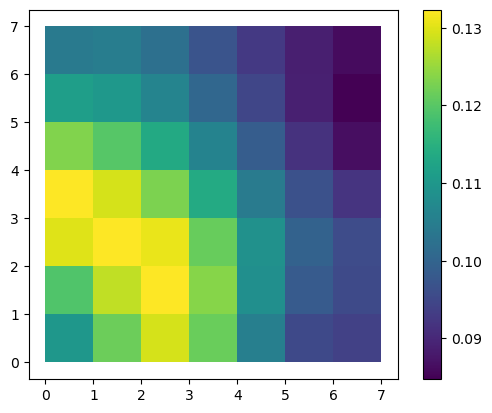

In [40]:
gdf.plot(column='Value', cmap='viridis', legend=True)

<Axes: ylabel='Frequency'>

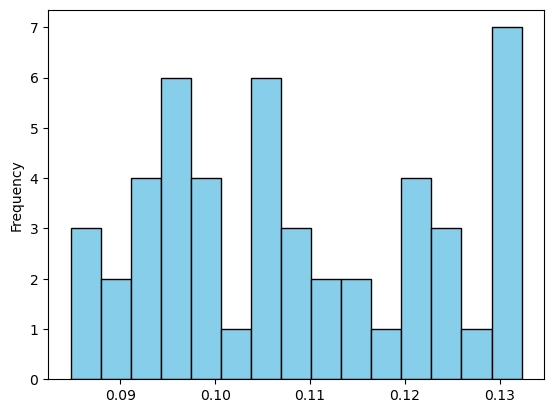

In [41]:
gdf['Value'].plot.hist(bins=15, color='skyblue', edgecolor='black')